<a href="https://colab.research.google.com/github/whomping-willow/ML_Final_Project/blob/main/Stroke_Pred_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Step Preprocessing**

In [9]:
#We have already visualized different attributes, removed outliers and extreme values using WEKA
df= pd.read_csv('C:/Datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
# id: A unique identifier for each individual in the dataset.
# gender: The gender of the individual (e.g., "Male", "Female", or other).
# age: The age of the individual, represented in years.
# hypertension: A binary value indicating if the individual has hypertension.
#   - 0: No hypertension
#   - 1: Has hypertension
# heart_disease: A binary value indicating if the individual has a history of heart disease.
#   - 0: No heart disease
#   - 1: Has heart disease
# ever_married: Indicates whether the individual has ever been married.
#   - "Yes": Married or previously married
#   - "No": Never married
# work_type: The type of work the individual is engaged in. Possible categories:
#   - "Private": Private sector job
#   - "Self-employed": Individual business or freelancing
#   - "Government": Government job
#   - "Children": Child not engaged in work
#   - "Never_worked": No history of work
# Residence_type: Indicates the individual's living area type.
#   - "Urban": Lives in an urban area
#   - "Rural": Lives in a rural area
# avg_glucose_level: The individual's average glucose level, typically measured in mg/dL.
# bmi: Body Mass Index, a measure of body fat based on height and weight.
# smoking_status: Smoking behavior of the individual. Possible categories:
#   - "Never smoked"
#   - "Formerly smoked"
#   - "Smokes"
#   - "Unknown": Information unavailable
# stroke: A binary value indicating if the individual has experienced a stroke.
#   - 0: No stroke
#   - 1: Stroke occurred


In [11]:
#Removing Outlier and ExtremeValue Column which are irrelevant to our dataset 
columns_to_drop = ['Outlier', 'ExtremeValue']
df = df.drop(columns_to_drop, axis=1, errors='ignore')


In [12]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df.shape

(5110, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
#Handling Missing Values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64



> We have 201 null values on bmi column, well I will replce these NAN values with the mean as we don't have much data and BMI don't change that much.

In [16]:
# Drop irrelevant columns
df = df.drop(columns=['id'], errors='ignore')


In [17]:
#Replacing NaN with mean bmi
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

28.893236911794666

In [18]:
#Checking if any null value exists
df.isnull().sum().sum()

0

In [19]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1




> **Using Correlation matrix and Heatmap function for identifying the relevance of attributes with stroke.**





In [20]:
#Label Encoding of categorical data to numeric data for correlation analysis.
# We need to map categorical variables to numerical values if they are not already
# For example, if 'gender' is a categorical variable, we can map it to 0 and 1
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))



1.   gender -> Female: 0, Male: 1
2.   ever_married -> Yes: 1, No: 0
3.   work_type -> Govt_job: 0, children: 1, Private: 2, Self_employed: 3
4.   Residence_type -> Rural: 0, Urban: 1
5.   smoking_status -> formerly smoked: 0, never smoked: 1, Unknown: 2, smokes: 3



In [21]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


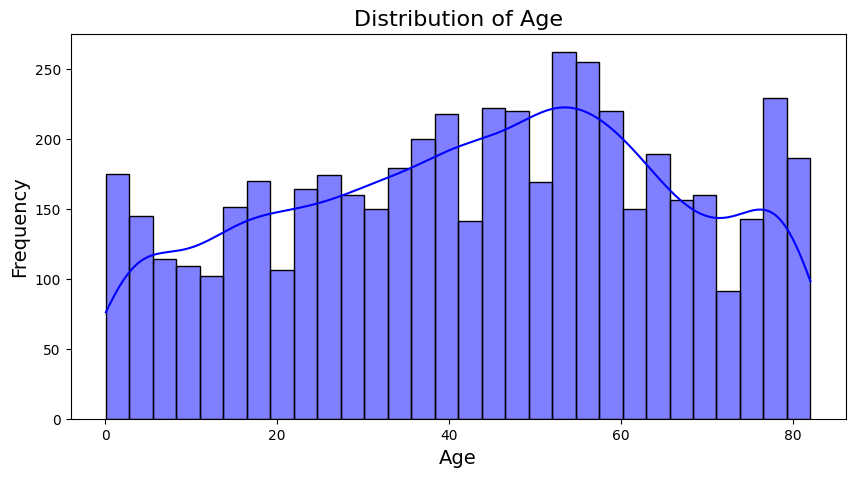

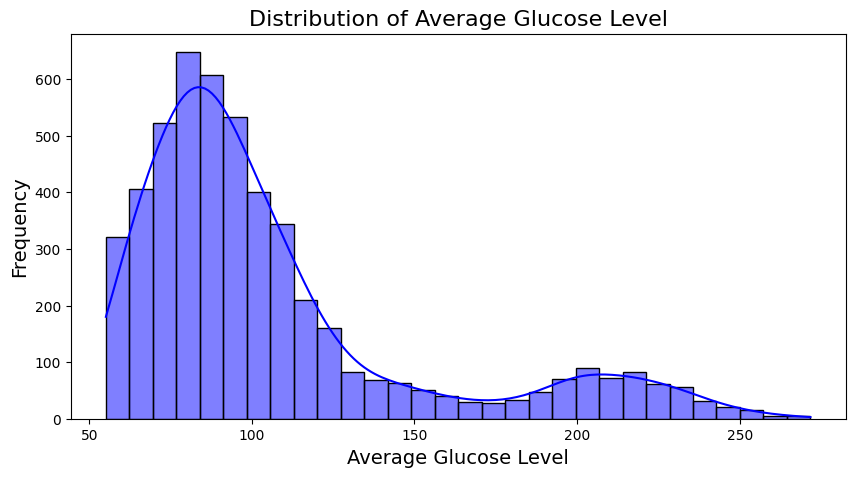

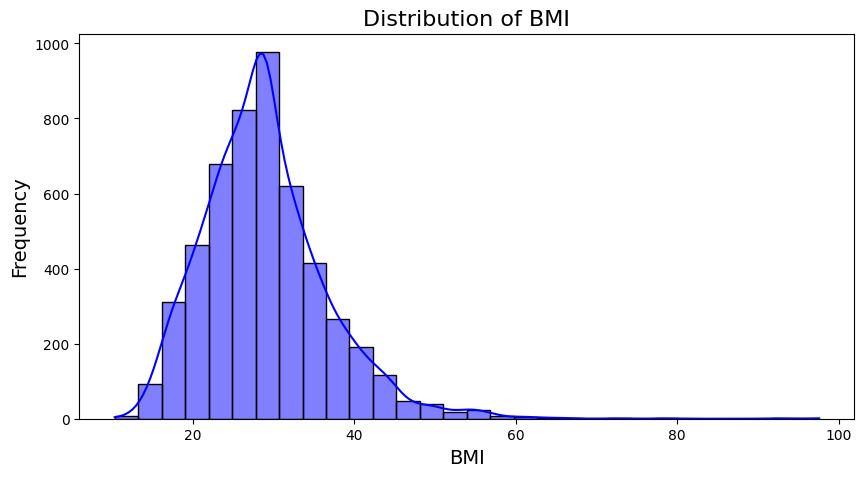

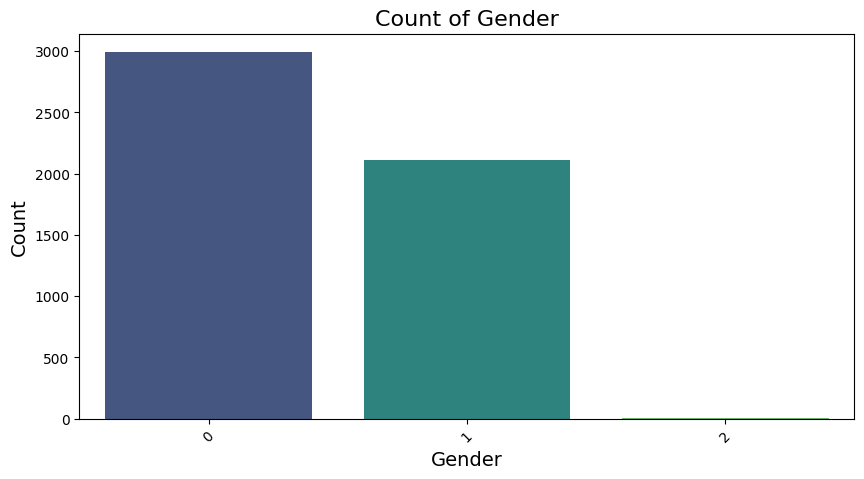

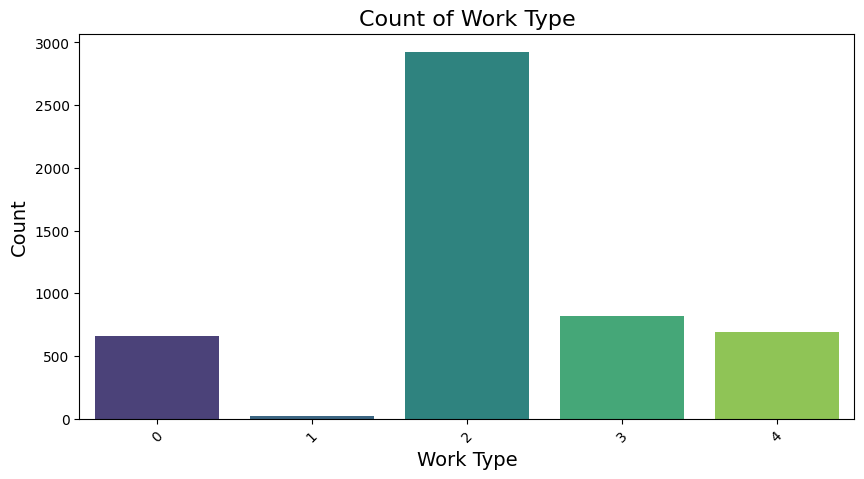

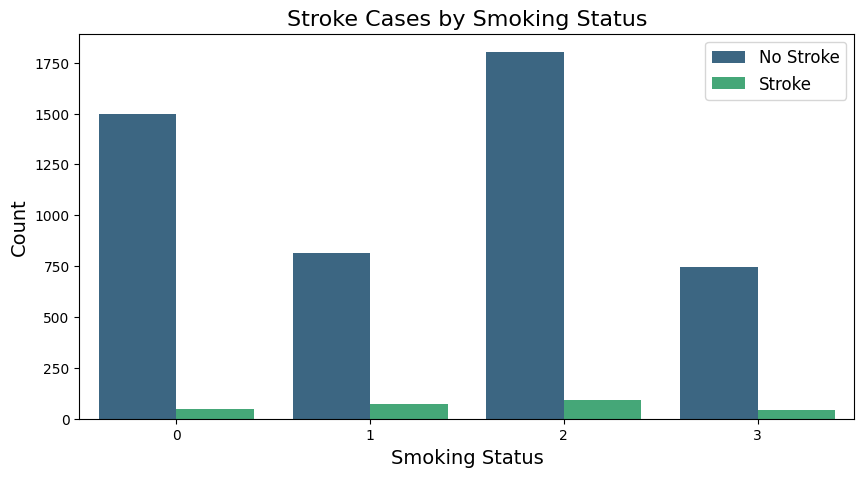

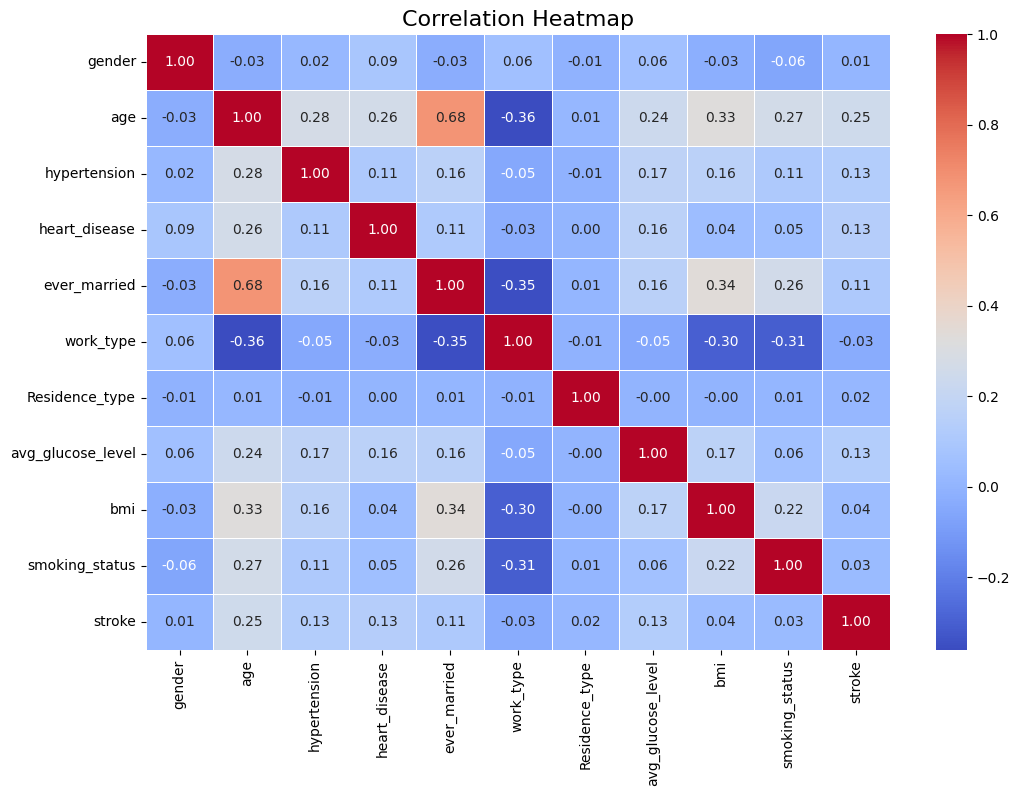

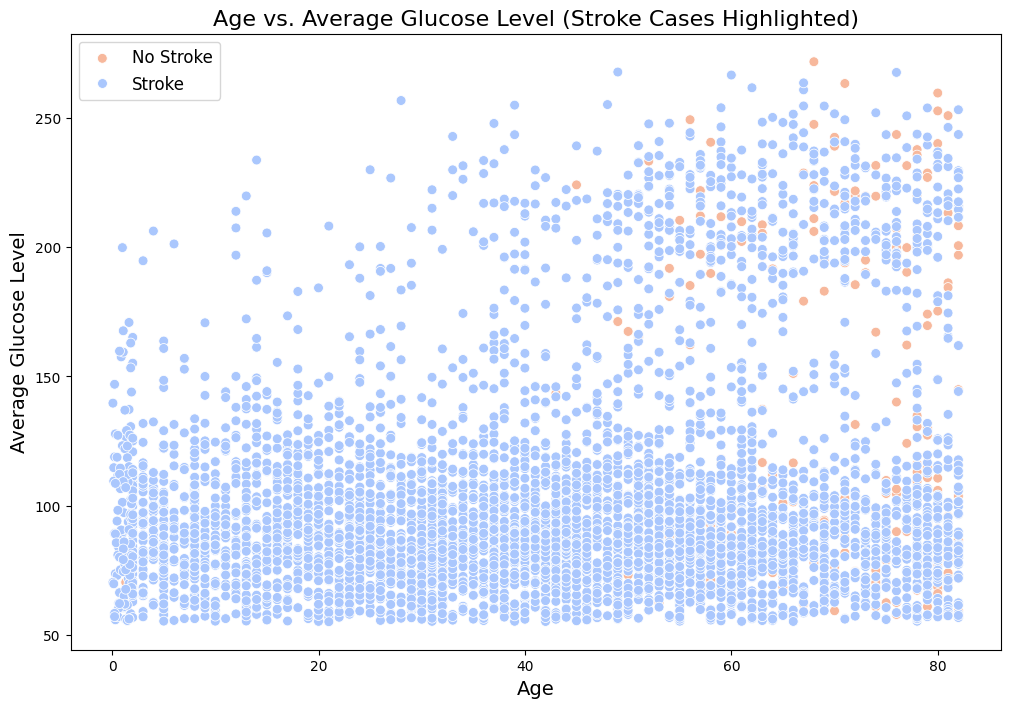

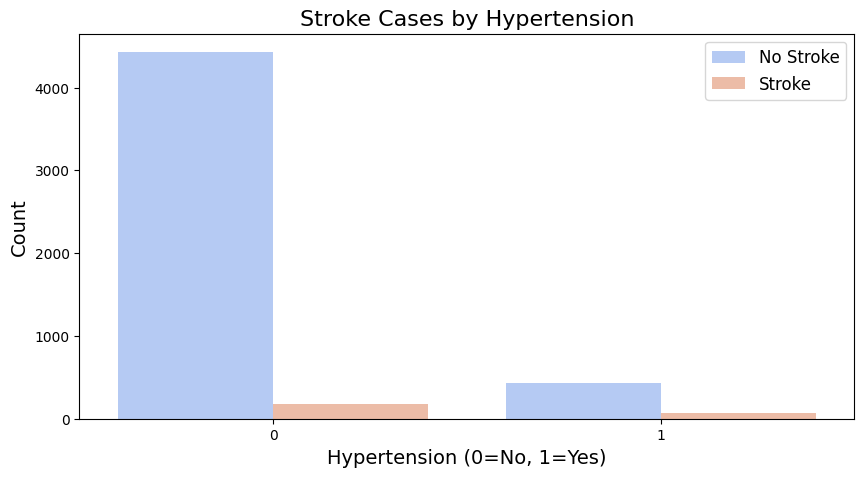

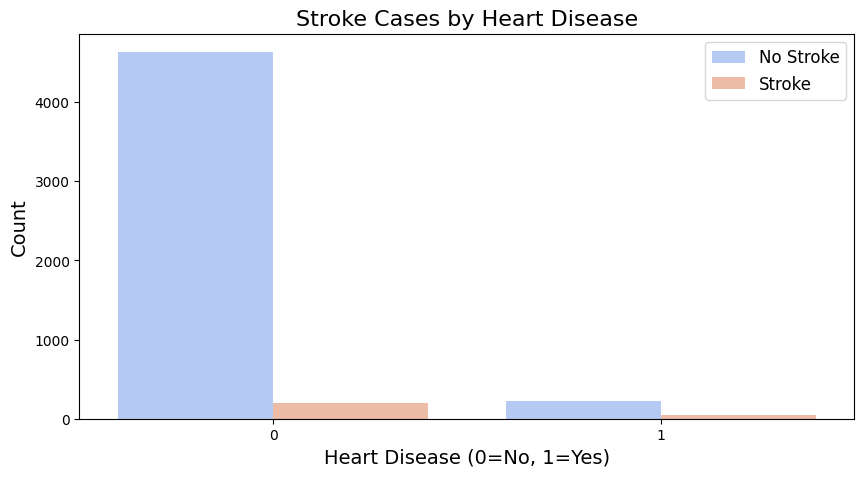

In [22]:

# Function to visualize the distribution of numerical features
def plot_distribution(feature, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {title}", fontsize=16)
    plt.xlabel(title, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.show()

# 1. Age Distribution
plot_distribution("age", "Age")

# 2. Average Glucose Level Distribution
plot_distribution("avg_glucose_level", "Average Glucose Level")

# 3. BMI Distribution
plot_distribution("bmi", "BMI")

# Bar plot for categorical features
def plot_categorical(feature, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[feature], palette="viridis")
    plt.title(f"Count of {title}", fontsize=16)
    plt.xlabel(title, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# 4. Gender Distribution
plot_categorical("gender", "Gender")

# 5. Work Type Distribution
plot_categorical("work_type", "Work Type")

# 6. Stroke Cases by Smoking Status
plt.figure(figsize=(10, 5))
sns.countplot(x=df["smoking_status"], hue=df["stroke"], palette="viridis")
plt.title("Stroke Cases by Smoking Status", fontsize=16)
plt.xlabel("Smoking Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(["No Stroke", "Stroke"], fontsize=12)
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 8. Pair Plot
#sns.pairplot(df, hue="stroke", diag_kind="kde", palette="Set2")
#plt.suptitle("Pair Plot of Features", y=1.02, fontsize=16)
#plt.show()

# 9. Stroke Cases by Age and Average Glucose Level
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue="stroke", palette="coolwarm", s=50)
plt.title("Age vs. Average Glucose Level (Stroke Cases Highlighted)", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Glucose Level", fontsize=14)
plt.legend(["No Stroke", "Stroke"], fontsize=12)
plt.show()

# 10. Distribution of Stroke Cases by Hypertension and Heart Disease
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="hypertension", hue="stroke", palette="coolwarm")
plt.title("Stroke Cases by Hypertension", fontsize=16)
plt.xlabel("Hypertension (0=No, 1=Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(["No Stroke", "Stroke"], fontsize=12)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="heart_disease", hue="stroke", palette="coolwarm")
plt.title("Stroke Cases by Heart Disease", fontsize=16)
plt.xlabel("Heart Disease (0=No, 1=Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(["No Stroke", "Stroke"], fontsize=12)
plt.show()

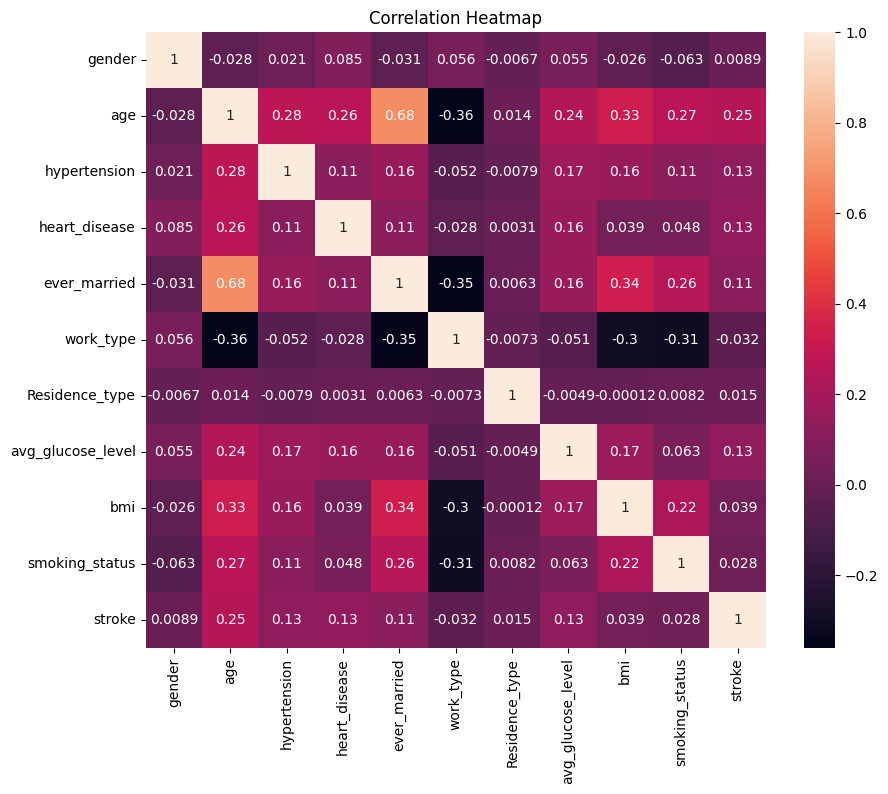

In [23]:
#Correlation Heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.title('Correlation Heatmap')
plt.show()



> ***Sorted attributes according to correlation values with target.***



In [24]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Get correlation values with target attribute (stroke)
correlation_with_target = correlation_matrix['stroke'].drop('stroke')  # Exclude target attribute from correlation values
correlation_with_target = correlation_with_target.abs()  # Take absolute values to consider both positive and negative correlations

# Sort attributes by relevance with target attribute
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Display sorted correlation values
print(sorted_correlation)


age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.038947
work_type            0.032316
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
Name: stroke, dtype: float64


# **Step#04: Applying SMOTE**

In [25]:
# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

stroke
0    4861
1     249
Name: count, dtype: int64


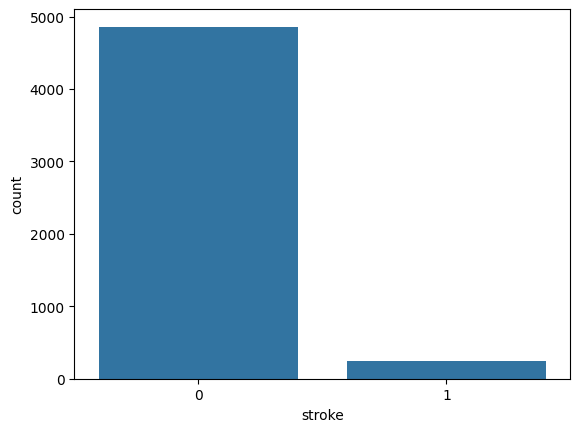

In [26]:
#Checking for imbalanced data
ax = sns.countplot(x='stroke',data=df)
print(df['stroke'].value_counts())



> *We can observe data imbalance. Let's oversample the minority class using SMOTE.*



In [27]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

stroke
1    4861
0    4861
Name: count, dtype: int64


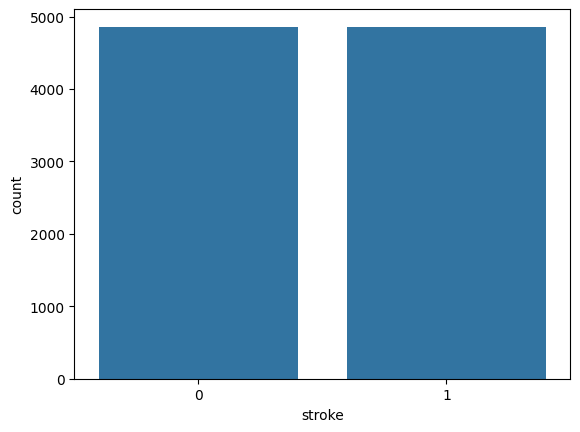

In [29]:
#Checking after applying SMOTE
# Convert y_resampled to DataFrame
y = pd.DataFrame(y, columns=['stroke'])
ax = sns.countplot(x='stroke',data=y)
print(y['stroke'].value_counts())

# **Step#05: Training Models**

In [30]:
#Importing Libraries for RandomFOrest, Logistic regression, XGBoost
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [31]:
# Define classifiers
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier()

classifiers = {'Random Forest': rf_clf, 'Logistic Regression': lr_clf, 'XGBoost': xgb_clf}

# **Step#5,6: Testing, Validation, Accuracy**

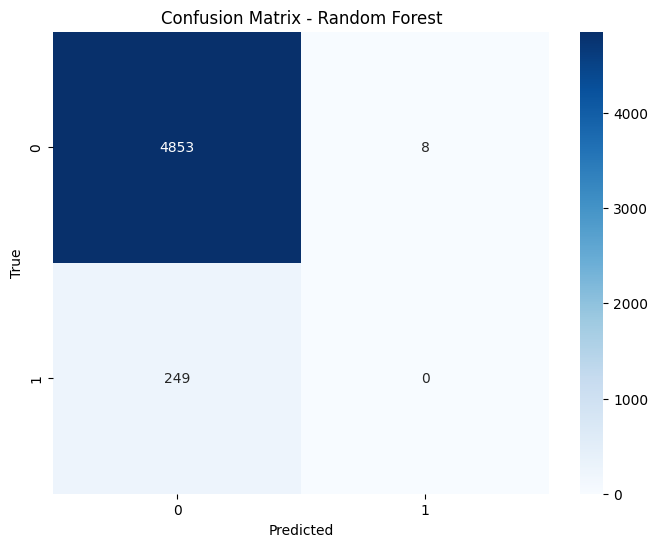

Classifier: Random Forest
Confusion Matrix:
[[4853    8]
 [ 249    0]]
Accuracy: 0.949706457925636
Precision: 0.0
Recall: 0.0
F1 Score: 0.0




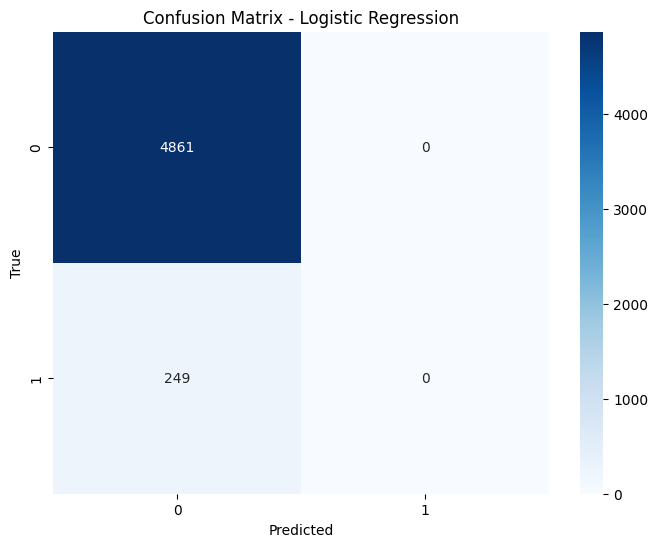

Classifier: Logistic Regression
Confusion Matrix:
[[4861    0]
 [ 249    0]]
Accuracy: 0.9512720156555773
Precision: 0.0
Recall: 0.0
F1 Score: 0.0




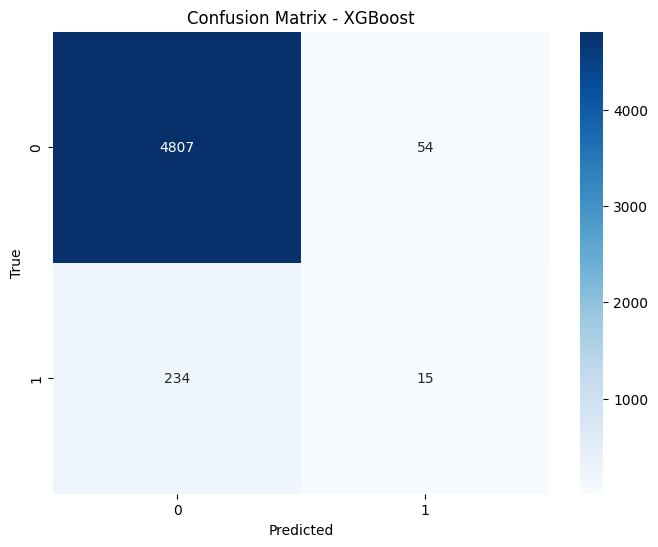

Classifier: XGBoost
Confusion Matrix:
[[4807   54]
 [ 234   15]]
Accuracy: 0.9436399217221135
Precision: 0.21739130434782608
Recall: 0.060240963855421686
F1 Score: 0.09433962264150944




In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Example: Replace with your dataset preparation code
# Assuming `df` is the DataFrame and 'stroke' is the target column

X = df.drop(columns=['stroke'])
y = df['stroke']

# Encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X.fillna(X.mean(), inplace=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    try:
        y_true, y_pred = [], []
        
        # Manual cross-validation
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            clf.fit(X_train, y_train)
            y_pred.extend(clf.predict(X_test))
            y_true.extend(y_test)
        
        # Compute performance metrics
        conf_matrix = confusion_matrix(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Draw confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

        # Print results
        print(f"Classifier: {name}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("\n")
    except Exception as e:
        print(f"Error with classifier {name}: {e}")


In [33]:
import pandas as pd
import numpy as np
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("C:/Datasets/healthcare-dataset-stroke-data.csv")

# Handle missing values
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

# Encode categorical variables
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop irrelevant features
columns_to_drop = ["id"]  # Drop unnecessary columns if present
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Separate features and target variable
X = df.drop(columns=["stroke"])
y = df["stroke"]

# Save the column order for later consistency
feature_columns = X.columns.tolist()

# Apply SMOTE for balancing the dataset
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert to DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=feature_columns)
y_resampled = pd.Series(y_resampled, name="stroke")

# Standardize numeric features
scaler = StandardScaler()
numeric_features = ["age", "avg_glucose_level", "bmi"]
X_resampled[numeric_features] = scaler.fit_transform(X_resampled[numeric_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Apply Scaling to Test Data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Define classifiers with optimized hyperparameters
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=5000, solver="saga", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, eval_metric="logloss", use_label_encoder=False, random_state=42),
}

# Train models and evaluate
best_model = None
best_f1 = 0

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities
    y_pred = (y_pred_prob > 0.3).astype(int)  # Adjusted threshold

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

    # Save the best performing model
    if f1 > best_f1:
        best_model = clf
        best_f1 = f1

# Save the best model and scalers
joblib.dump(best_model, "best_model.pkl")
joblib.dump(feature_columns, "feature_columns.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Best model, feature columns, and scaler saved.")


Random Forest - Accuracy: 0.75, Precision: 1.00, Recall: 0.51, F1 Score: 0.67
Gradient Boosting - Accuracy: 0.60, Precision: 1.00, Recall: 0.20, F1 Score: 0.34
Logistic Regression - Accuracy: 0.54, Precision: 1.00, Recall: 0.07, F1 Score: 0.13
XGBoost - Accuracy: 0.55, Precision: 1.00, Recall: 0.11, F1 Score: 0.19
Best model, feature columns, and scaler saved.


In [34]:
import pandas as pd
import joblib

def predict_new_data(new_data, threshold=0.3):
    # Load the saved model and scaler
    feature_columns = joblib.load("feature_columns.pkl")
    model = joblib.load("best_model.pkl")

    # Ensure the input data matches the trained feature order
    new_data_df = pd.DataFrame([new_data], columns=feature_columns)

    # Debugging Step: Print to verify input shape
    print("Shape of new_data_df:", new_data_df.shape)
    print("Expected columns:", feature_columns)

    # If the model is a pipeline, apply transformation directly
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(new_data_df)[:, 1]  # Get probability for stroke (class 1)
    else:
        raise ValueError("Loaded model does not have predict_proba method.")

    # Apply decision threshold
    prediction = (prob > threshold).astype(int)

    return prediction[0], prob[0]

# Test Cases
low_risk_case = {
    'age': 25.0,  
    'hypertension': 0,  
    'heart_disease': 0,  
    'avg_glucose_level': 90.0,  
    'bmi': 22.0,  
    'gender_Male': 1,  
    'ever_married_Yes': 0,  
    'work_type_Private': 1,  
    'work_type_Self-employed': 0,  
    'work_type_children': 0,  
    'Residence_type_Urban': 1,  
    'smoking_status_formerly smoked': 0,  
    'smoking_status_never smoked': 1,  
    'smoking_status_smokes': 0  
}

pred, prob = predict_new_data(low_risk_case)
print(f"Prediction: {'Stroke' if pred == 1 else 'No Stroke'}, Probability: {prob:.2%}")


Shape of new_data_df: (1, 16)
Expected columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
Prediction: Stroke, Probability: 41.92%


In [35]:
low_risk_case = {
    'age': 30.0,  
    'hypertension': 0,  
    'heart_disease': 0,  
    'avg_glucose_level': 90.0,  
    'bmi': 22.0,  
    'gender_Male': 1,  
    'gender_Other': 0,  # Must be included
    'ever_married_Yes': 0,  
    'work_type_Never_worked': 0,  # Must be included
    'work_type_Private': 1,  
    'work_type_Self-employed': 0,  
    'work_type_children': 0,  
    'Residence_type_Urban': 1,  
    'smoking_status_formerly smoked': 0,  
    'smoking_status_never smoked': 1,  
    'smoking_status_smokes': 0  
}

pred, prob = predict_new_data(low_risk_case)
print(f"Prediction: {'Stroke' if pred == 1 else 'No Stroke'}, Probability: {prob:.2%}")


Shape of new_data_df: (1, 16)
Expected columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
Prediction: Stroke, Probability: 41.92%
